# Churn prediction with Machine Learning

Import statements 

In [1]:
import pandas as pds;
import numpy as nmp;
import sklearn as skl;
import plotly.graph_objects as go;
import plotly.express as plot_ex;
from plotly.offline import plot;
from plotly.graph_objs import *;

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/kobloutsos/ML_2021/main/TelcoChurn_1.csv';
data1 = pds.read_csv(url, sep=";");
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Descriptive analysis

In [3]:
print (data1.describe(include='all'));


        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7349-ALMUX   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

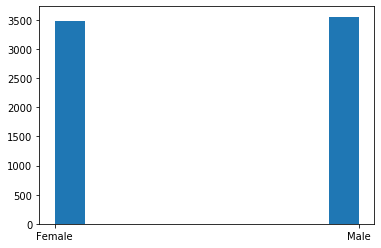

In [4]:
plt.hist(data1.gender) 
#plt.hist(data1.SeniorCitizen)
#plt.hist(data1.Partner)  
#plt.hist(data1.Dependents)
#plt.hist(data1.PhoneService)
#plt.hist(data1.MultipleLines)
#plt.hist(data1.InternetService)
#plt.hist(data1.OnlineSecurity)
#plt.hist(data1.OnlineBackup)
#plt.hist(data1.DeviceProtection)
#plt.hist(data1.TechSupport)
#plt.hist(data1.StreamingTV)
#plt.hist(data1.StreamingMovies)
#plt.hist(data1.Contract)
#plt.hist(data1.PaperlessBilling)
#plt.hist(data1.PaymentMethod)
#plt.hist(data1.Churn)

plt.show()
plt.rcParams["figure.figsize"] = (5,3)


In [5]:
pds.crosstab(index=data1['gender'], columns='Churn')
#pds.crosstab(index=data1['SeniorCitizen'], columns='Churn')
#pds.crosstab(index=data1['Partner'], columns='Churn')
#pds.crosstab(index=data1['Dependents'], columns='Churn')
#pds.crosstab(index=data1['PhoneService'], columns='Churn')
#pds.crosstab(index=data1['MultipleLines'], columns='Churn')
#pds.crosstab(index=data1['InternetService'], columns='Churn')
#pds.crosstab(index=data1['OnlineSecurity'], columns='Churn')
#pds.crosstab(index=data1['OnlineBackup'], columns='Churn')
#pds.crosstab(index=data1['DeviceProtection'], columns='Churn')
#pds.crosstab(index=data1['TechSupport'], columns='Churn')
#pds.crosstab(index=data1['StreamingTV'], columns='Churn')
#pds.crosstab(index=data1['StreamingMovies'], columns='Churn')
#pds.crosstab(index=data1['PaperlessBilling'], columns='Churn')
#pds.crosstab(index=data1['PaymentMethod'], columns='Churn')
 

col_0,Churn
gender,
Female,3488
Male,3555


In [6]:
#data2=pds.get_dummies(data1.Partner, prefix='Partner',drop_first=False);


data_2 = pds.concat([data1,pds.get_dummies(data1['gender'], prefix='gender',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['SeniorCitizen'], prefix='SeniorCitizen',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['Partner'], prefix='Partner',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['Dependents'], prefix='Dependents',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['PhoneService'], prefix='PhoneService',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['MultipleLines'], prefix='MultipleLines',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['InternetService'], prefix='InternetService',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['OnlineSecurity'], prefix='OnlineSecurity',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['OnlineBackup'], prefix='OnlineBackup',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['DeviceProtection'], prefix='DeviceProtection',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['TechSupport'], prefix='TechSupport',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['StreamingTV'], prefix='StreamingTV',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['StreamingMovies'], prefix='StreamingMovies',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['Contract'], prefix='Contract',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['PaperlessBilling'], prefix='PaperlessBilling',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['PaymentMethod'], prefix='PaymentMethod',drop_first=True)],axis=1);
data_2 = pds.concat([data_2,pds.get_dummies(data1['Churn'], prefix='Churn',drop_first=True)],axis=1);


In [7]:
#gets a random 80% of the entire set
data_train =data_2.sample(frac=0.85, random_state=1)
#gets the left out portion of the dataset
data_test= data_2.loc[~data_2.index.isin(data_train.index)]

In [8]:
X_train = data_train.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn','Churn_Yes'],axis=1)

X_test = data_test.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn','Churn_Yes'],axis=1)





In [9]:
Y_train = data_train.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],axis=1)

Y_test = data_test.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],axis=1)

In [10]:
data_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,1,0,1,0,0,1,0,1,0,0
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,1,0,1,0,1,0,1,0,0,0
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,0,0,0,0,0,0,1,0,0,1
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,0,0,1,0,0,1,0,1,0,1
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,1685-BQULA,Female,0,No,No,40,Yes,Yes,Fiber optic,No,...,1,0,0,0,0,1,0,0,0,0
7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,1,0,0,0,0,1,1,0,0,0
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,1,0,1,1,0,1,0,1,0,0
7025,2823-LKABH,Female,0,No,No,18,Yes,Yes,Fiber optic,No,...,0,0,1,0,0,1,0,0,0,0


DECISSION TREE

Confusion Matrix
[[679  87]
 [165 125]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       766
           1       0.59      0.43      0.50       290

    accuracy                           0.76      1056
   macro avg       0.70      0.66      0.67      1056
weighted avg       0.75      0.76      0.75      1056



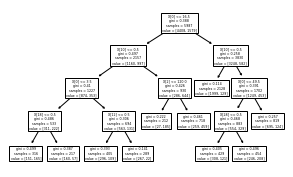

In [11]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred)) 
tree.plot_tree(clf)
plt.show()

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.793


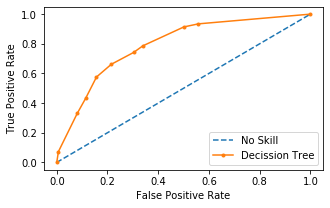

In [12]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
 
ns_probs = [0 for _ in range(len(Y_test))]    
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decission Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

LOGISTIC REGRESSION

In [14]:
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

X_trn = pds.DataFrame(X_train)
Y_trn = pds.DataFrame(Y_train)


In [15]:
model = LogisticRegression(solver = 'liblinear', random_state=0);
model.fit(X_trn,Y_trn.values.reshape(-1));
y_pred=model.predict(X_test)
y_pred1 = pds.DataFrame(y_pred)
#test_acc = (nmp.count_nonzero(y_pred1==Y_test)/len(y_pred1)*100)
print("Confusion Matrix")
print(confusion_matrix(Y_test, y_pred1))
print(classification_report(Y_test,y_pred1)) 

Confusion Matrix
[[683  83]
 [139 151]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       766
           1       0.65      0.52      0.58       290

    accuracy                           0.79      1056
   macro avg       0.74      0.71      0.72      1056
weighted avg       0.78      0.79      0.78      1056



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.824


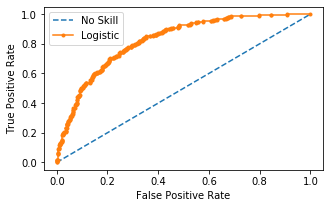

In [16]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
 
ns_probs = [0 for _ in range(len(Y_test))]    
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()